# 0 install numpy, matplotlib, pillow

In [ ]:
!pip install numpy

安装numpy数值计算包

In [ ]:
!pip install matplotlib
!pip install pillow

安装matplotlib/pyplot显示图像

# 1 Install tensorflow

在命令行中使用pip install tensorflow（gpu版本：pip install tensorflow-gpu）

## 验证是否安装成功

In [1]:
import tensorflow as tf #导入成功

C:\Users\zhenchen\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Activation Function（激活函数）

### ReLU函数

ReLU函数是Softplus函数的钝化版本。ReLU函数有几种推广版本：

绝对值整流（absolute value rectification）。

渗漏整流线性单元（Leaky ReLU）。

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.linspace(-5,5,100)

In [4]:
relu = lambda x: np.maximum(x, 0)

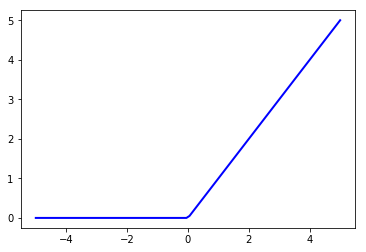

In [5]:
plt.plot(x, relu(x), color='blue', lw=2)

### PReLU

参数化整流线性单元（parametric ReLU）或者PReLU。

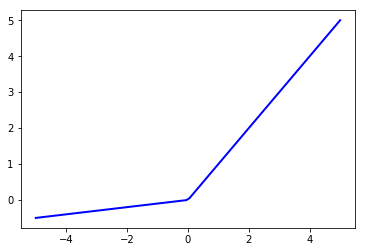

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)
pr = lambda xs: [x*0.1 if x <0 else x for x in xs] 

plt.plot(x, pr(x), color='blue', lw=2)

### Softplus函数

Softplus函数是ReLu函数的软化版本。

In [7]:
import matplotlib.pyplot as plt
import numpy as np

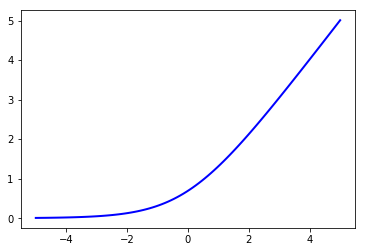

In [8]:
x = np.linspace(-5,5,100)
softplus = lambda x: np.log(1.0 + np.exp(x))
plt.plot(x, softplus(x), color='blue', lw=2)

### sigmoid函数

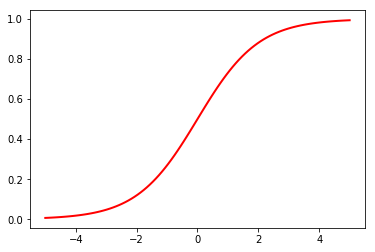

In [6]:
x = np.linspace(-5,5,100)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
plt.plot(x,sigmoid(x), color='red', lw=2)

### 饱和型S函数

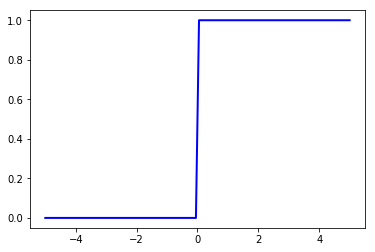

In [7]:
x = np.linspace(-5,5,100)
pr = lambda xs: [0 if x <0 else 1 for x in xs] 
plt.plot(x, pr(x), color='blue', lw=2)

### logit函数

/Users/Kimmo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


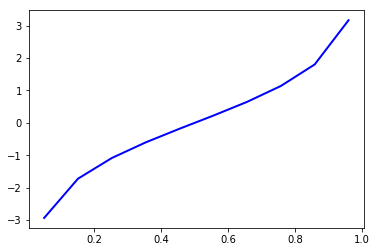

In [11]:
x = np.linspace(-5,5,100)
logit = lambda x: np.log(x / (1 - x))
plt.plot(x,logit(x), color='blue', lw=2)

### SoftSign函数

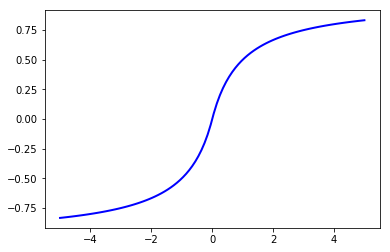

In [12]:
x = np.linspace(-5,5,100)
softsign = lambda x: x / (1 + np.absolute(x))
plt.plot(x,softsign(x), color='blue', lw=2)

### tanh函数

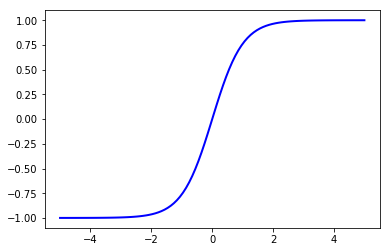

In [13]:
x = np.linspace(-5,5,100)
th = lambda x: np.tanh(x)
plt.plot(x,th(x), color='blue', lw=2)

### hard tanh函数

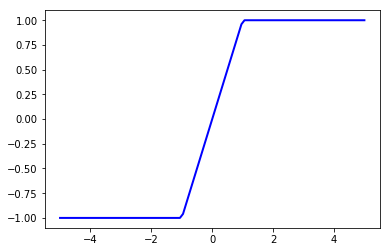

In [14]:
def hard_tanh(x):
    if abs(x)<1:
        return x
    else:
        if x>1: 
            return 1
        else:
            return -1
x = np.linspace(-5,5,100)
htan = lambda xs: [hard_tanh(x) for x in xs] 
plt.plot(x,htan(x), color='blue', lw=2)

### softmax函数

In [16]:
import math
w=[1,2,3,4,5,6,7,8,9]
w_exp=[math.exp(i) for i in w]
print(w_exp)

[2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 148.4131591025766, 403.4287934927351, 1096.6331584284585, 2980.9579870417283, 8103.083927575384]


In [17]:
sum_w_exp = sum(w_exp)

In [18]:
softmax = [round(i / sum_w_exp, 3) for i in w_exp]

In [19]:
print(softmax)

[0.0, 0.001, 0.002, 0.004, 0.012, 0.031, 0.086, 0.233, 0.632]


In [20]:
print(sum(softmax))

1.001


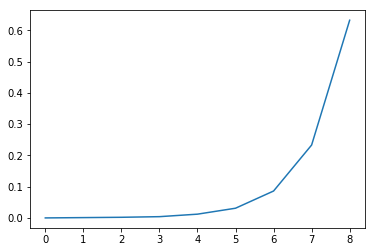

In [21]:
plt.plot(softmax)

## Tensorflow的变量和运算

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
a=tf.random_normal([2,16])
sess=tf.Session()
out=sess.run(a)
x, y=out

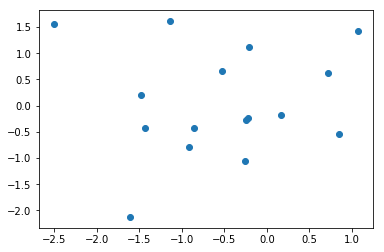

In [24]:
plt.scatter(x,y)

TensorFlow的变量

In [10]:
A=tf.Variable([[1,2],[3,4]], dtype=tf.float32)
A.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [11]:
B=tf.Variable([[5,6],[7,8]],dtype=tf.float32)
B.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [12]:
C=tf.matmul(A,B)

TensorFlow变量的运算

In [13]:
tf.global_variables()

[<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(2, 2) dtype=float32_ref>]

In [14]:
init = tf.global_variables_initializer()

In [15]:
sess =tf.Session()

In [16]:
sess.run(init)

In [17]:
print(sess.run(C))

[[19. 22.]
 [43. 50.]]


In [18]:
print(sess.run(tf.reduce_sum(C, 0)))

[62. 72.]


In [19]:
print(sess.run(tf.reduce_sum(C, 1)))

[41. 93.]


## TensorFlow 激活函数

In [20]:
R=tf.Variable([1.,.2,3],dtype=tf.float32)
T=tf.Variable([True, True, False, False], dtype=tf.bool)
U=tf.Variable([True, True, True, False], dtype=tf.bool)


In [21]:
init=tf.global_variables_initializer()

In [22]:
sess.run(init)

### Sigmoid 函数

In [23]:
print(sess.run(tf.nn.sigmoid(R, name="last")))

[0.7310586  0.54983395 0.95257413]


### SOFTMAX 函数

In [24]:
print(sess.run(tf.nn.softmax(R,dim=-1, name="last")))

Instructions for updating:
dim is deprecated, use axis instead
[0.11314285 0.05083836 0.83601886]


### SOFTPLUS函数

In [25]:
print(sess.run(tf.nn.softplus(R,name="last")))

[1.3132616 0.7981388 3.0485873]


### ReLU函数

In [26]:
print(sess.run(tf.nn.relu(R,name="XXX")))

[1.  0.2 3. ]


### Tensor操作reshape函数

In [43]:
Y=tf.Variable([[1,2,3],[4,5,6]],dtype=tf.float32)

In [44]:
sess.run(tf.global_variables_initializer())

In [45]:
print(sess.run(Y))

[[ 1.  2.  3.]
 [ 4.  5.  6.]]


In [46]:
print(sess.run(tf.reshape(Y,[6])))

[ 1.  2.  3.  4.  5.  6.]


In [47]:
print(sess.run(tf.reshape(Y,[3,2])))

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]]


In [48]:
print(sess.run(tf.reshape(Y,[-1])))

[ 1.  2.  3.  4.  5.  6.]


In [49]:
print(sess.run(tf.reshape(Y, [-1,1])))

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]]


# TensorFlow Keras First Example

In [28]:
import tensorflow as tf

print(tf.VERSION)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [27]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2956 - acc: 0.9152
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.1429 - acc: 0.9583
Epoch 3/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.1067 - acc: 0.9676
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0865 - acc: 0.9735
Epoch 5/5
10000/10000 [==============================] - 0s 28us/step


[0.0761636847697664, 0.9767]